In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [2]:
import numpy as np
import pandas as pd
import datetime as dt


# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func


In [4]:
# Create engine using the `hawaii.sqlite` database file
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [7]:
# Declare a Base using `automap_base()`
Base = automap_base()
# Use the Base class to reflect the database tables
Base.prepare(autoload_with=engine)

In [8]:
# Print all of the classes mapped to the Base
print(Base.classes.keys())

['station', 'measurement']


In [10]:
# Assign the measurement class to a variable called `Measurement` and
# the station class to a variable called `Station`
Measurement = Base.classes.measurement
Station = Base.classes.station

In [11]:
# Create a session
session = Session(engine)

# Exploratory Precipitation Analysis

In [20]:
# Find the most recent date in the data set.
recent_date = session.query(func.max(Measurement.date)).first()[0]
print(recent_date)

2017-08-23


Date one year ago: 2016-08-23 00:00:00


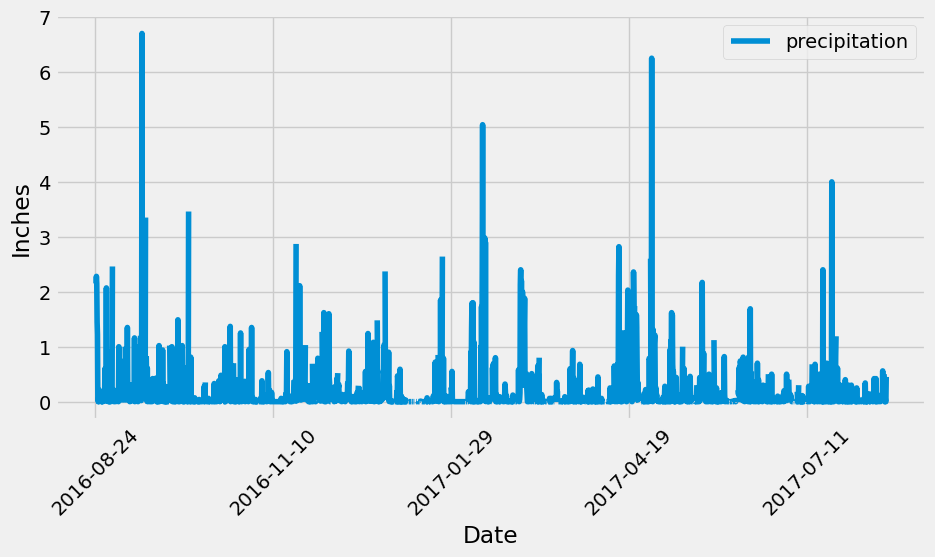

In [27]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Starting from the most recent data point in the database.

# Calculate the date one year from the last date in data set.
recent_date_dt = dt.datetime.strptime(recent_date, "%Y-%m-%d")
one_year_ago = recent_date_dt - dt.timedelta(days=365)
print(f"Date one year ago: {one_year_ago}")

# Perform a query to retrieve the data and precipitation scores
precip_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= one_year_ago).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precip_df = pd.DataFrame(precip_data, columns=["date", "precipitation"]).set_index("date")

# Sort the dataframe by date
precip_df = precip_df.sort_index()

# Use Pandas Plotting with Matplotlib to plot the data
precip_df.plot(rot=45, figsize=(10, 5))
plt.xlabel("Date")
plt.ylabel("Inches")
plt.show()

In [31]:
# Use Pandas to calculate the summary statistics for the precipitation data
precip_stats = precip_df.describe()
precip_stats = precip_stats.style.format("{:.6f}")

from IPython.display import display
display(precip_stats)

,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [42]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(func.count(Station.station)).all()
print(total_stations)

[(9,)]


In [47]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.id))\
    .group_by(Measurement.station)\
    .order_by(func.count(Measurement.id).desc())\
    .all()

for station in active_stations:
    print(station)

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [49]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = active_stations[0][0]

temps = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs))\
    .filter(Measurement.station == most_active_station).all()

print(temps[0])

(54.0, 85.0, 71.66378066378067)


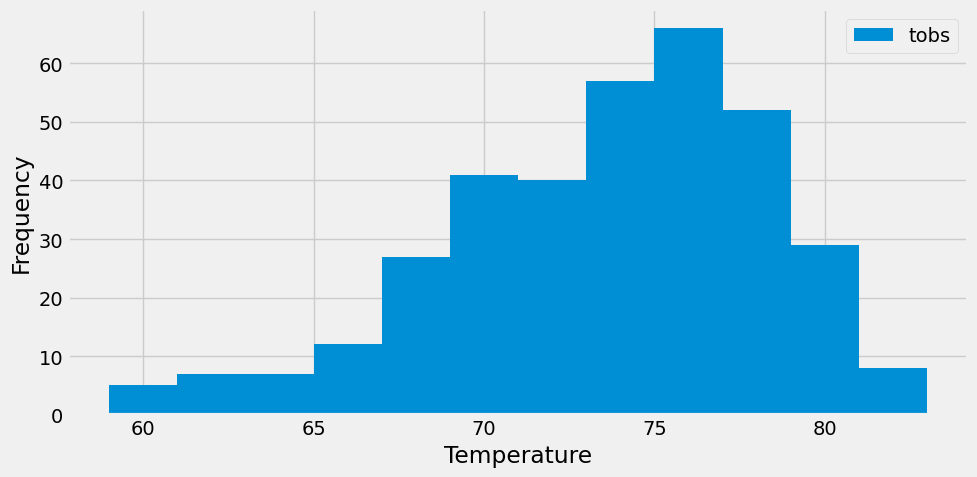

In [65]:
# Using the most active station id
most_active_station = active_stations[0][0]
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tobs_data = session.query(Measurement.tobs)\
    .filter(Measurement.station == most_active_station)\
    .filter(Measurement.date >= one_year_ago)\
    .all()

tobs_df = pd.DataFrame(tobs_data, columns=["tobs"])

tobs_df.plot(kind="hist", bins=12, figsize=(10, 5))
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()



# Close Session

In [66]:
# Close Session
session.close()
